In [20]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
df = pd.read_csv('/Users/gimdogyun/Desktop/빅데이터_애널리틱스_프로젝트/Big_analytics_project/movie_finished_toFDA_V9.csv')
df.head()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


,naver_movie_code,kobis_movie_code,movie_title,release_date,DoW_release,Date,DoW,MoY,D_D,DailyTotal,RV_Total,NTZ_Total,Total_Negative,RV_Negative,NTZ_Negative,Total_Neutral,RV_Neutral,NTZ_Neutral,Total_Positive,RV_Positive,NTZ_Positive,Total_Dailyscore,RV_Dailyscore,NTZ_Dailyscore,Total_neg_ratio,Total_neut_ratio,Total_pos_ratio,RV_neg_ratio,RV_neut_ratio,RV_pos_ratio,NTZ_neg_ratio,NTZ_neut_ratio,NTZ_pos_ratio,Total_Entropy,RV_Entropy,NTZ_Entropy,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,nationality,genre,사극,SF,어드벤처,액션,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,성인물(에로),장르1평균관객수,장르2평균관객수,장르3평균관객수,장르1평균누적관객수,장르2평균누적관객수,장르3평균누적관객수,장르1평균스크린수,장르2평균스크린수,장르3평균스크린수,장르평균관객수,장르평균누적관객수,장르평균스크린수,directors,감독군,directors_naver_code,actors,actors_naver_code,actor_power,director_power,rev_acc,RV_male,RV_female,RV_teen,RV_twenties,RV_thirties,RV_forties,RV_fifties,NTZ_score_total,NTZ_review_total,NTZ_male_score,NTZ_female_score,NTZ_teen_score,NTZ_twenties_score,NTZ_thirties_score,NTZ_forties_score,NTZ_fifties_more_score,NTZ_direct_point,NTZ_act_point,NTZ_story_point,NTZ_visual_point,NTZ_ost_point,RV_score_total,RV_review_total,RV_male_score,RV_female_score,RV_teen_score,RV_twenties_score,RV_thirties_score,RV_forties_score,RV_fifties_more_score,RV_direct_point,RV_act_point,RV_story_point,RV_visual_point,RV_ost_point,running_time,watch_grade,제작사,배급사,제공,배급사군,영화명(검색),비교영화1(검색),비교영화2(검색),비교영화3(검색),비교영화4(검색),영화명_검색량,비교영화1_검색량,비교영화2_검색량,비교영화3_검색량,비교영화4_검색량,감독평균최대관객수,log_감독평균최대관객수,감독총최대관객수,log_감독총최대관객수,배급사평균최대관객수,log_배급사평균최대관객수,배급사총최대관객수,log_배급사총최대관객수,요일평균관객수,요일평균누적관객수,요일평균스크린수,월평균관객수,월평균누적관객수,월평균스크린수,장르평균관객수.1,장르평균누적관객수.1,장르평균스크린수.1,국적평균관객수,국적평균누적관객수,국적평균스크린수,등급평균관객수,등급평균누적관람객수,등급평균스크린수,7days_before,5days_before,Day_of_release,5days_after,7days_after
0,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.7,Thursday,January,0,612,38,574,146,10,136,66,5,61,400,23,377,7.405229,6.631579,7.456446,0.238562,0.107843,0.653595,0.263158,0.131579,0.605263,0.236933798,0.106271777,0.656794425,0.782821,0.839309,0.778727844,503,0.092,2317,0.146,360219,0.139,0.176,482064700,475557700 ( 7308.4% ),63347,62541 ( 7759.4% ),547138700,70697,4,한국,멜로/로맨스,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2630,0,0,338514,0,0,39,0,0,2630,338514,39,이윤정,3.0,147870,"정우성, 김하늘, 배성우, 장영남, 조이진, 임주은, 허진, 이준혁","2523, 1758, 132765, 49334, 50396, 15608, 40908...",68205993.22,449.614747,-318.981925,43%,57%,5%,52%,27%,12%,5%,6.71,"3,600",6.67,6.85,6.76,6.37,6.74,7.12,7.81,12%,50%,38%,0%,0%,6.72,685,6.99,6.51,6.32,6.74,6.78,6.78,6.33,0%,0%,0%,0%,0%,106,15세이상관람가,(주)더블유 팩토리,씨제이이앤엠(주),씨제이이앤엠(주),3,나를 잊지 말아요,히말라야,"셜록, 유령신부","내부자들, 디 오리지널",굿 다이노,100.00000,9.13566,6.65951,37.61888,14.48984,427197.0,5.630628,427197.0,5.630628,2061850.0,6.314257,127834717.0,8.106649,5717,539355,69,11120,576831,655763,2630,338514,39,12056,859493,95,9090,596341,79,11,11,13,6,33
1,107374,20142641,나를 잊지 말아요,2016.1.7,Thursday,2016.1.8,Friday,January,1,332,50,282,78,11,67,41,13,28,213,26,187,6.930723,7.040000,6.911348,0.234940,0.123494,0.641566,0.220000,0.260000,0.520000,0.237588652,0.09929078,0.663120567,0.804053,0.931529,0.767520013,524,0.093,2314,0.144,359876,0.136,0.155,454390900,-27673800 ( -5.7% ),55628,-7719 ( -12.2% ),1001529600,126325,4,한국,멜로/로맨스,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2630,0,0,338514,0,0,39,0,0,2630,338514,39,이윤정,3.0,147870,"정우성, 김하늘, 배성우, 장영남, 조이진, 임주은, 허진, 이준혁","2523, 1758, 132765, 49334, 50396, 15608, 40908...",68205993.22,449.614747,27.777830,43%,57%,5%,52%,27%,12%,5%,6.71,"3,600",6.67,6.85,6.76,6.37,6.74,7.12,7.81,12%,50%,38%,0%,0%,6.72,685,6.99,6.51,6.32,6.74,6.78,6.78,6.33,0%,0%,0%,0%,0%,106,15세이상관람가,(주)더블유 팩토리,씨제이이앤엠(주),씨제이이앤엠(주),3,나를 잊지 말아요,히말라야,"셜록, 유령신부","내부자들, 디 오리지널",굿 다이노,80.98905,27.84054,20.72169,97.23515,41.92913,427197.0,5.630628,427197.0,5.630628,2061850.0,6.314257,127834717.0,8.106649,7008,567310,73,11120,576831,655763,2630,338514,39,12056,859493,95,9090,596341,79,11,11,13,6,33
2,107374,20142641,나를 잊지 말아요,201

#### 도메인
* 1. 국내의 경우, 배급사와 투자사가 일치한다 -> 배급사가 수익성을 고려하는 조건이 된다
* 2. 극장과 배급사는 영화 개봉 이후에, 흥행 여부를 고려하여 스크린수와 좌석수를 줄여 좌석판매율을 유지한다 -> 피해를 줄이려는 전략 but 흥행이 예상되는 경우 스크린수와 좌석수를 유지해 좌석판매율이  급감한다.
* 3. drop_ratio -> 추후에 추가하겠음 
* ...

#### 1. 가설
* 배급사와 투자사는 일정 수준 이상의 수익성을 기대하여 영화에 투자하게 된다. 영화에 대한 투자여부는 영화의 여러가지 요소(시나리오,장르,배우 등등)을 고려하여 결정한다. 모든 영화에 대해 천만 관객을 바라는 것은 아니지만, 투자 규모에 상응하는 수익성을 얻기를 기대한다. 

* **그렇다면 영화의 규모? 제작비?에 상응하는 지표**를 어떻게 설정할 것 인가? 혹은 수익성은 어떻게 설정할 것인가?

#### 수익성-규모 분석
* 참고 문헌: 개봉 규모와 수익성에 따른 영화의 분류와 확산 패턴 분석


* 규모: 개봉일의 좌석 수를 영화의 규모를 측정하는 대용 척도(proxy measure)로 선정하였다. -> 개봉일의 좌석수를 영화의 규모에 대한 척도로 사용한 이유

* 1. 영화의 제작비가 개봉 이전에 결정되는 요인이라는 점
* 2. 개봉일의 상용관 수 혹은 좌석의 수 경우, 많은 연구에서 영화의 배급력을 나타내는 변수
* 3. 무엇보다 제작자 및 배급사의 입장에서 제작 규모에 따라, 이 두 변수가 제작 규모를 적절히 반영할 것으로 기대할 수 있다.
* 4. 마지막으로, 상영관 수와 좌석 수 모두 영화의 규모를 반영하고 있지만, 멀티플렉스가 대부분인 한국 영화 시장의 특성을 고려할때(전체 상영관 수의 94.5%),규모가 큰 영화일수록 좌석 수가 많은 대형 상영관에 배정된다는 점과 제작비가 높은 3D 영화와 IMAX 영화의 경우 역시 해당 포맷을 위한 상영관이 모두 많은 좌석 수를 가진 점에 주목하였다

In [21]:
# 영화별 개봉일의 좌석수
df_규모_수익성 = pd.DataFrame()
df_규모_수익성['movie_title'] = df['movie_title'].unique()

# 15번째마다 행 남기기
df_규모_수익성 = pd.merge(df[::15][['좌석수', 'movie_title']], df_규모_수익성, on='movie_title', how='left').copy()

* 수익성: 일반적으로, 특정 상품이나 프로젝트 등 투자 대상의 수익성은 투자 규모에 대비한 매출로서 평가된다. 따라서 본 연구에서는 이와 같은 기준으로 사용하여 2주간의 누적 매출를 제작 규모인 개봉일의 좌석수로 나눈 값을 수익성의 척도로 정의하였다.

In [22]:
# 1. 영화별 누적 관객수를 계산
sum_viewer = df.groupby('movie_title')['매출액'].sum()

# 2. 원본 데이터프레임에 누적 관객수를 매핑하여 새로운 컬럼으로 추가
df['누적_매출액'] = df['movie_title'].map(sum_viewer)

In [23]:
df_규모_수익성 = pd.merge(df[['movie_title','누적_매출액']], df_규모_수익성, on='movie_title', how='left').copy()

# 영화별로 묶기
df_규모_수익성 = df_규모_수익성.groupby(['movie_title']).mean()

# 수익성
df_규모_수익성['수익성'] = df_규모_수익성['누적_매출액'] / df_규모_수익성['좌석수']

df_규모_수익성.rename(columns={'좌석수':'규모(좌석수)'}, inplace=True)
df_규모_수익성.drop('누적_매출액', axis=1, inplace=True)
df_규모_수익성

,규모(좌석수),수익성
movie_title,,
0.0MHz,123789.0,8479.431775
12 솔져스,138259.0,12625.869564
1987,1070761.0,34097.398702
1급기밀,203601.0,8067.636701
23 아이덴티티,323402.0,39463.714000
...,...,...
혹성탈출: 종의 전쟁,865589.0,18835.825060
혼숨,118636.0,18611.816995
후드,305002.0,7043.529711


#### 1. 과연 규모와 수익성간의 상관관계는 어떻게 될 것인가? 
* 놀랍게도 -0.05라는 상관관계가 나온다

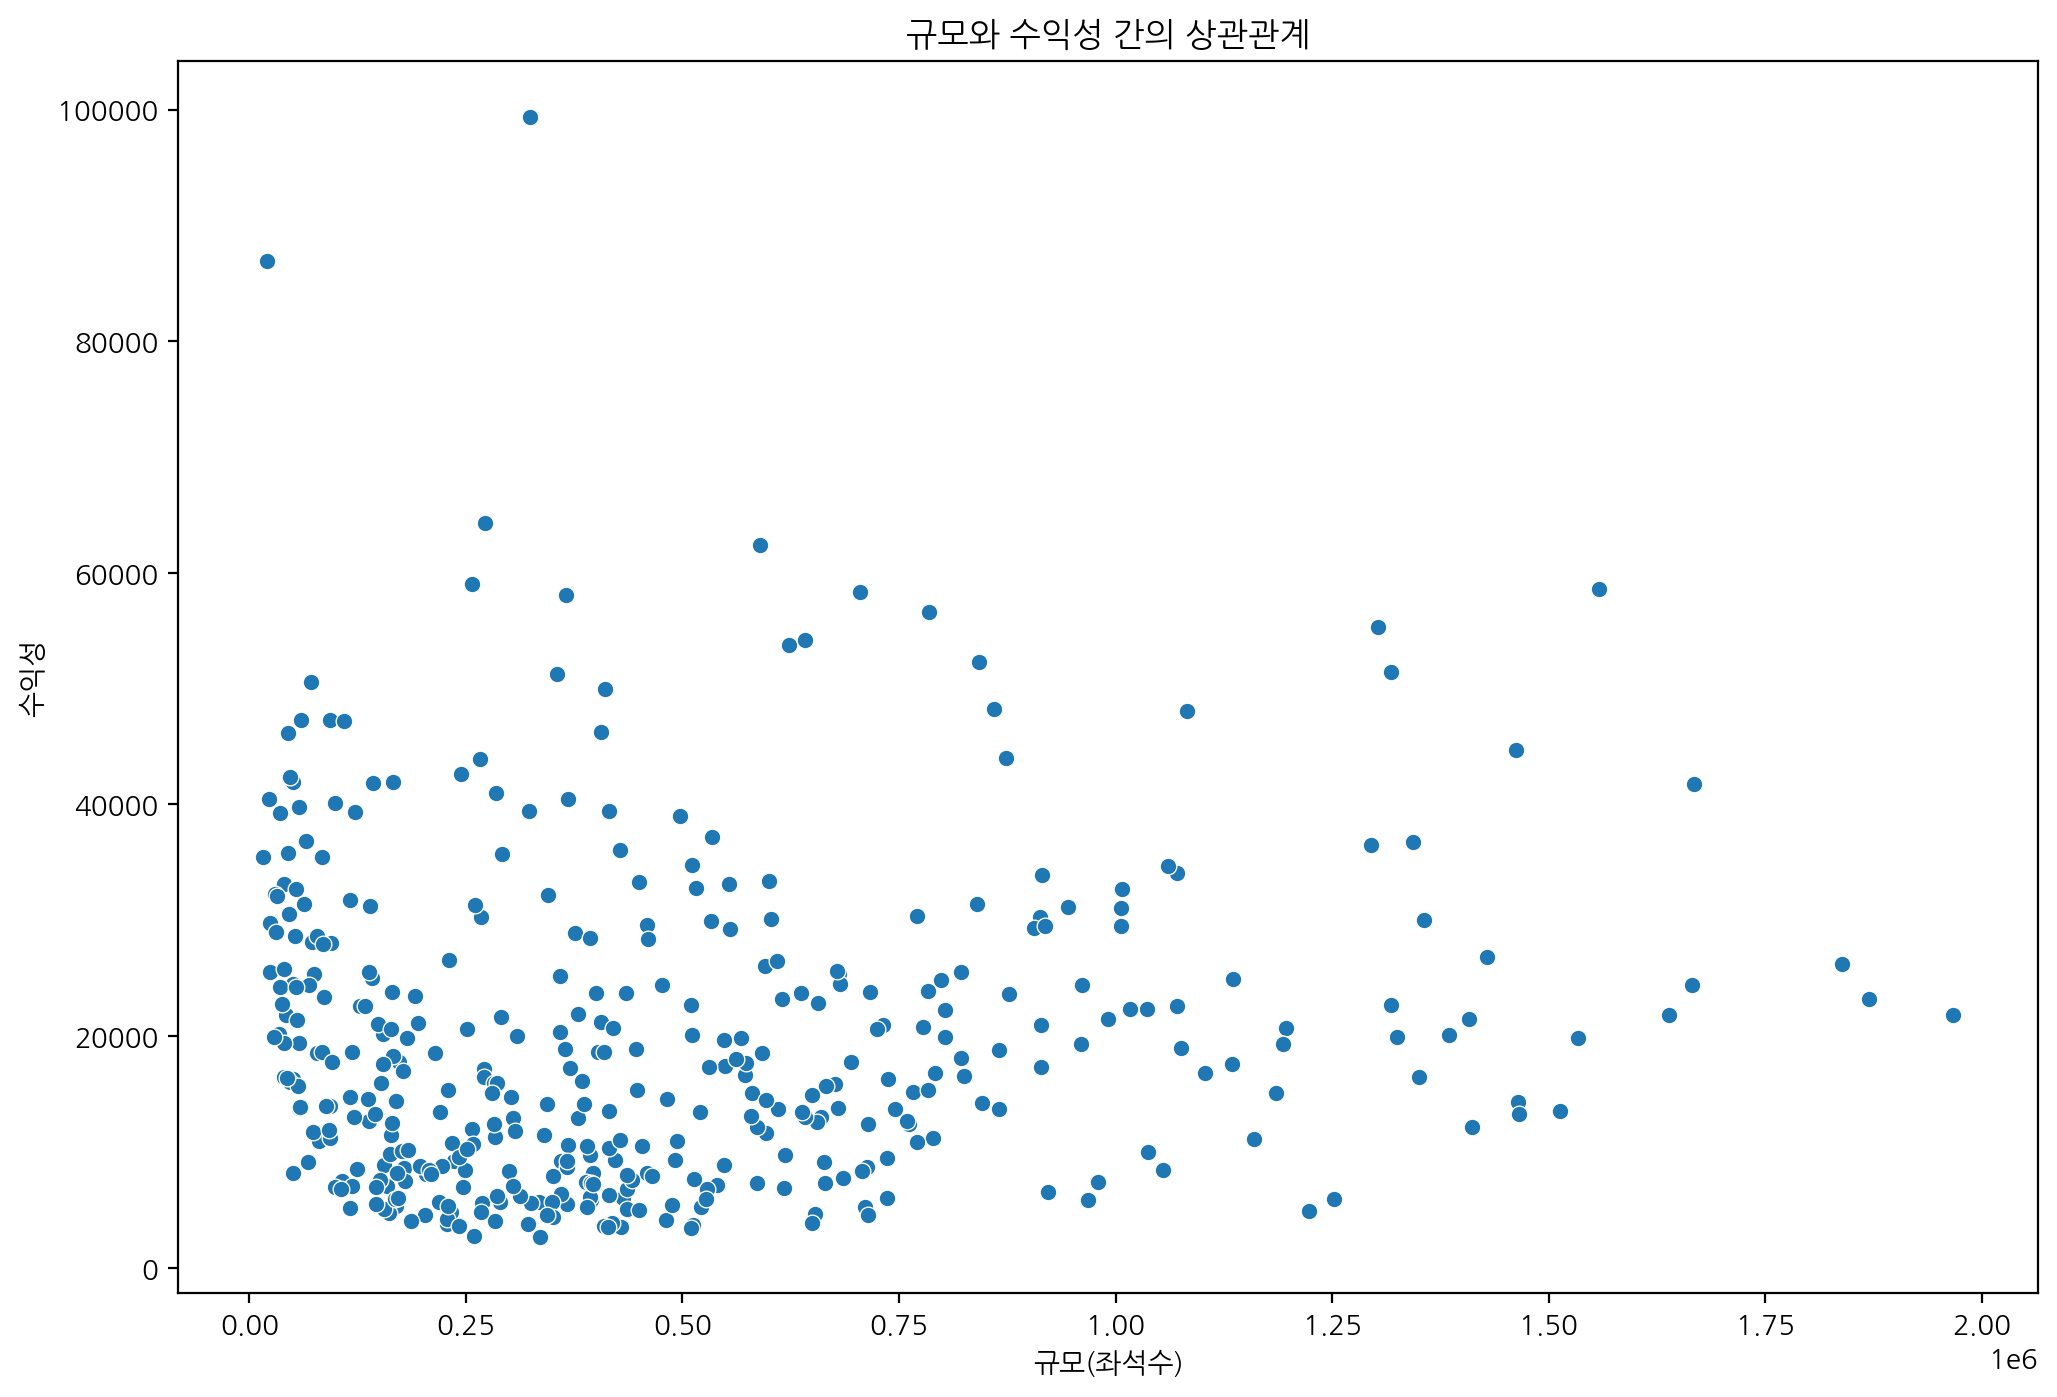

규모와 수익성 간의 상관계수: -0.05566907238298016


In [24]:
# 규모와 수익성 간의 상관관계 분석 -> 각각의 변수에 대해 log 정규화
df_규모_수익성_log = df_규모_수익성.copy()
df_규모_수익성_log['규모(좌석수)'] = np.log1p(df_규모_수익성['규모(좌석수)'])
df_규모_수익성_log['수익성'] = np.log1p(df_규모_수익성['수익성'])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_규모_수익성, x='규모(좌석수)', y='수익성')
plt.title('규모와 수익성 간의 상관관계')
plt.show()
print('규모와 수익성 간의 상관계수:', df_규모_수익성_log['규모(좌석수)'].corr(df_규모_수익성_log['수익성']))


#### 1. 규모와 수익성간의 상관은 정말 없는 것일까?
#### 2. 수익성에 영향을 끼치는 피쳐는 무엇일까?

#### 위의 질문들을 검증하기 위해 영화(409)개를 규모와 수익성 측면에서 4개의 군집으로 클러스터링을 실시한다.

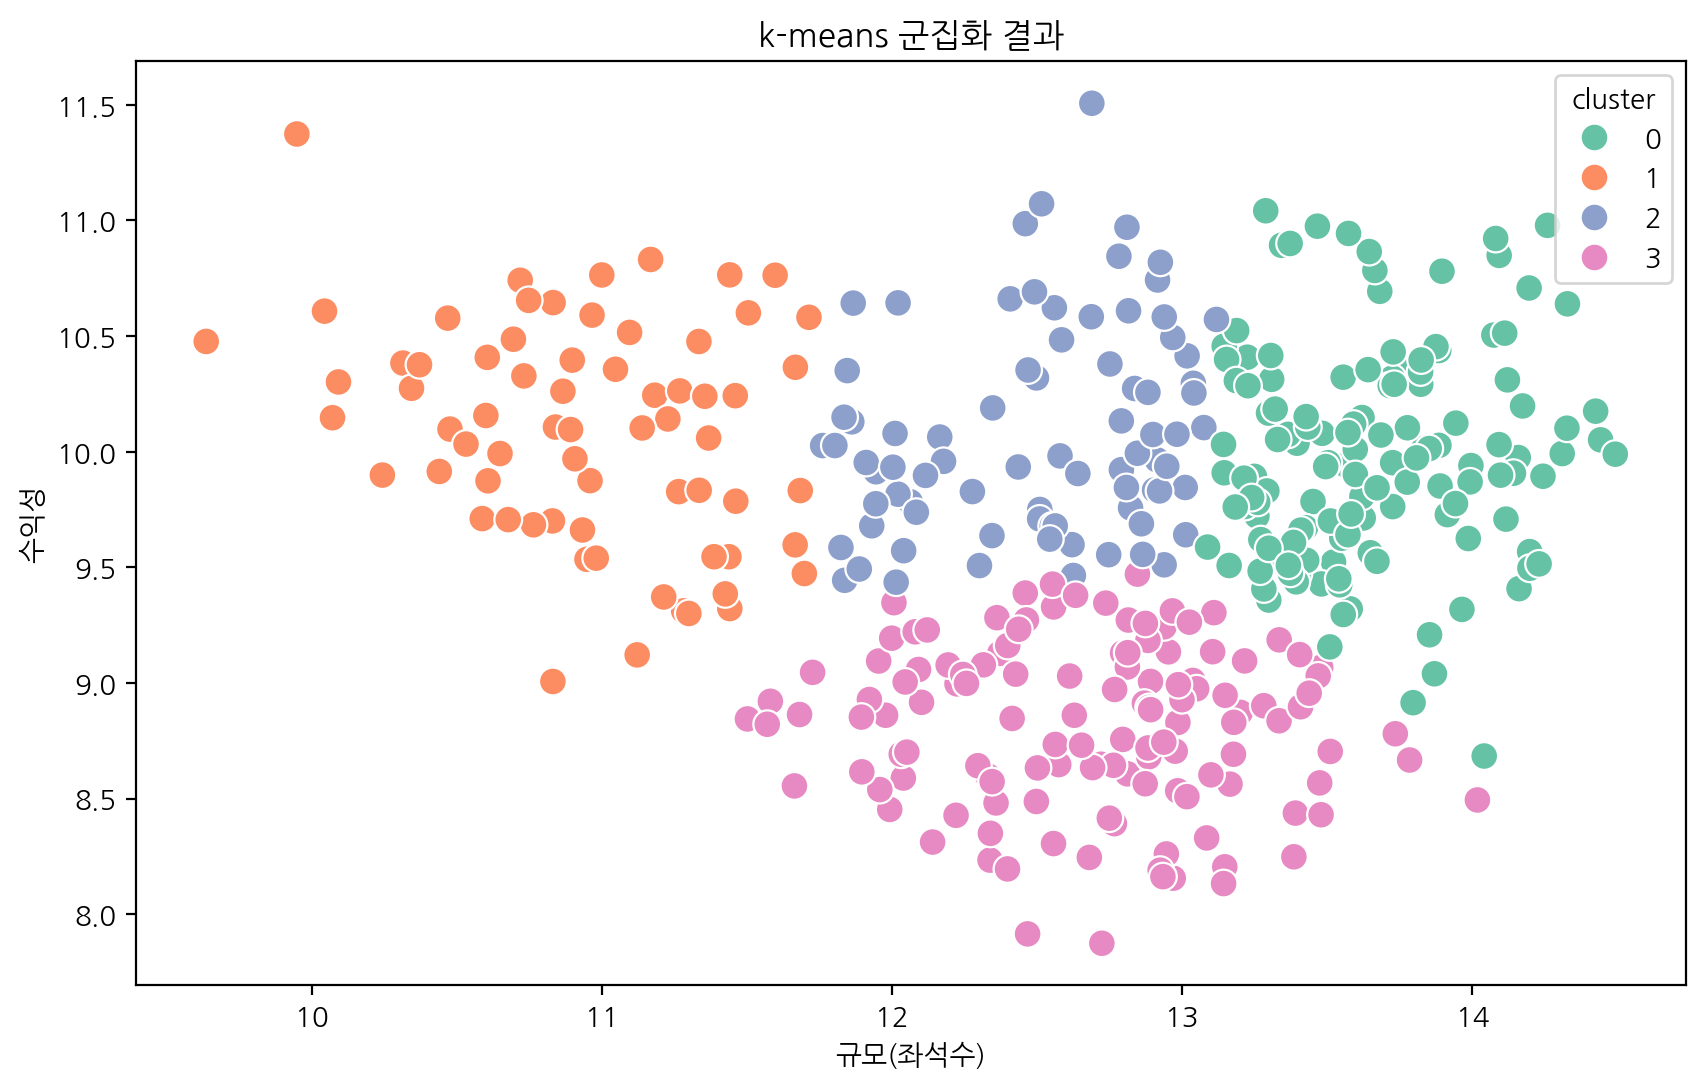

In [25]:
# log 정규화된 데이터로 규모와 수익성 간의 상관관계 분석
df_규모_수익성['규모(좌석수)'] = np.log1p(df_규모_수익성['규모(좌석수)'])
df_규모_수익성['수익성'] = np.log1p(df_규모_수익성['수익성'])

# k-means 군집화
from sklearn.cluster import KMeans

# k-means 모델 생성
kmeans = KMeans(n_clusters=4, random_state=123)

# 모델 학습
kmeans.fit(df_규모_수익성)

# 군집 결과
df_규모_수익성['cluster'] = kmeans.labels_

# 군집 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_규모_수익성, x='규모(좌석수)', y='수익성', hue='cluster', palette='Set2', s=100)
plt.title('k-means 군집화 결과')
plt.show()

In [26]:
# 군집별 통계량
df_규모_수익성.groupby('cluster').mean()

# 군집 개수
#df_규모_수익성['cluster'].value_counts()

,규모(좌석수),수익성
cluster,,
0,13.656885,9.976444
1,10.946365,10.090062
2,12.501577,10.082493
3,12.681279,8.809643


군집별 특징을 좌석 수(규모)와 수익성의 평균을 기반으로 해석할 수 있습니다.

* Cluster 0

    * 규모: 평균 좌석 수가 13.66으로 가장 큰 규모를 보이는 군집입니다.
    * 수익성: 평균 수익성은 9.98로, 중간 정도의 수익성을 보여줍니다.
    * 특징: 상대적으로 규모가 크지만, 수익성은 최상위 수준이 아닙니다. 대규모 사업장이지만 운영 효율이나 시장 상황에 따라 수익성이 보통 수준에 머물 가능성이 있습니다.
* Cluster 1

    * 규모: 평균 좌석 수가 10.95로 가장 작은 규모입니다.
    * 수익성: 평균 수익성은 10.09로, 모든 군집 중 가장 높습니다.
    * 특징: 소규모 운영으로도 높은 수익성을 달성하고 있는 군집으로, 효율적인 운영이나 특정 시장에서의 경쟁력을 갖추었을 가능성이 있습니다.
* Cluster 2

    * 규모: 평균 좌석 수가 12.50으로 중간 정도의 규모를 가집니다.
    * 수익성: 평균 수익성은 10.08로, Cluster 1에 약간 못 미치지만 여전히 높은 수준입니다.
    * 특징: 적당한 규모와 높은 수익성을 동시에 유지하는 군집으로, 균형 잡힌 비즈니스 모델을 가지고 있을 가능성이 큽니다.
* Cluster 3

    * 규모: 평균 좌석 수가 12.68로 중간 상위 수준입니다.
    * 수익성: 평균 수익성은 8.81로, 모든 군집 중 가장 낮습니다.
    * 특징: 비교적 큰 규모에도 불구하고 수익성이 낮은 군집으로, 비용 구조 문제, 시장 상황, 또는 고객 유치의 어려움이 원인일 수 있습니다.

#### 군집별 회귀 분석을 통해 군집별로 수익성에 미치는 변수들의 영향력을 본다

In [27]:
df_규모_수익성_0 = df_규모_수익성[df_규모_수익성['cluster'] == 0]
df_규모_수익성_1 = df_규모_수익성[df_규모_수익성['cluster'] == 1]
df_규모_수익성_2 = df_규모_수익성[df_규모_수익성['cluster'] == 2]
df_규모_수익성_3 = df_규모_수익성[df_규모_수익성['cluster'] == 3]

#### 앞으로 회귀 분석에 사용할 칼럼 정리

In [28]:
# 독립변수

#1. 국적: nationality
#2. 장르: genre
#3. 등급: watch_grade
#4. 감독: director_power
#5. 배우: actor_power
#6. 배급사: 배급사평균최대관객수
#7. 스크린수: 스크린점유율
#8. 상영수: 상영점유율
#9. 좌석수: 좌석 점유율
#10. 포털평점: RV_score_total
#11. 소셜미디어: Total_neg_ratio,Total_neut_ratio,Total_pos_ratio

# 국적 -> 앞으로 국내 영화와 해외 영화로 분리할 예정
col_national = ['nationality'] 

# 장르 정보: -> 이후에 선형 종속 문제를 해결하기 위해 칼럼 하나를 삭제할 예정(액션)
col_genre= ['사극', 'SF', '어드벤처','범죄', '판타지', '가족', '미스터리', '스릴러', '뮤지컬',
       '코미디', '공포(호러)', '애니메이션', '드라마', '서부극(웨스턴)', '전쟁', '멜로/로맨스', '기타',
       '다큐멘터리', '공연', '액션','성인물(에로)']

# 관람 가능 연령 타입 -> 더미 변수화
col_watch_grade = ['watch_grade']

# 영화 제작 구성원 -> 감독,배우 파워
col_power = ['director_power', 'actor_power']

# 영화 상영 정보
col_screen = ['스크린점유율','상영점유율']

# 영화 평점 정보
col_score = ['RV_score_total']

# 소셜미디어 정보 여기서 DailyTotal -> 댓글수
col_social = ['Total_neg_ratio','Total_pos_ratio','DailyTotal']


# movie_title
col_movie_title = ['movie_title']

# 입소문 칼럼



* nationality -> 국내와 해외 영화로 분류:

In [29]:
# '한국영화'라는 값이 있으면 1로, 그렇지 않으면 0으로 변경 -> 1이면 한국영화
df['nationality'] = df['nationality'].apply(lambda x: 1 if '한국' in x else 0)

In [30]:
def create_dummies(df, columns, drop_first=True): # 더미 변수 생성을 위한 함수
    return pd.get_dummies(df, columns=columns, drop_first=drop_first)

def convert_data_types(df): # True,False -> 0,1로 변환
    df.update(df.select_dtypes(include=['bool']).astype(int))
    return df

def apply_log_transformation(df, columns): # 로그 변환
    for column in columns:
        df[column] = np.log1p(df[column])
    return df

def compute_daily_averages(df, daily_columns, key='movie_title'): # 일별 데이터 집계
    daily_averages = df.groupby(key)[daily_columns].mean().reset_index()
    df = df.drop(columns=daily_columns).merge(daily_averages, on=key, how='left')
    return df.groupby(key).mean().reset_index()


# df 변수와 필요한 열 이름 리스트는 이전에 정의되어 있어야 합니다.
df_selected = df[col_movie_title + col_national + col_genre + col_watch_grade + col_power + col_screen + col_score + col_social].copy()

# 더미 변수 생성
df_selected = create_dummies(df_selected, ['nationality', 'watch_grade'])

# 데이터 타입 변환
df_selected = convert_data_types(df_selected)

# 정규화
log_columns = ['director_power', 'actor_power','DailyTotal']
df_selected = apply_log_transformation(df_selected, log_columns)

# 일별 데이터 집계
daily_columns = ['스크린점유율', '상영점유율', 'RV_score_total', 'Total_neg_ratio', 'Total_pos_ratio']
df_selected = compute_daily_averages(df_selected, daily_columns)

/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_9989/2244469048.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.update(df.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_9989/2244469048.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.update(df.select_dtypes(include=['bool']).astype(int))
/var/folders/mz/tk5z94ds1qd9c1jb2p8qys9m0000gn/T/ipykernel_9989/2244469048.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly ca

In [31]:
pd.set_option('display.max_columns', None)
df_selected

,movie_title,사극,SF,어드벤처,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,액션,성인물(에로),director_power,actor_power,DailyTotal,nationality_1,watch_grade_15세이상관람가,watch_grade_전체관람가,watch_grade_청소년관람불가,스크린점유율,상영점유율,RV_score_total,Total_neg_ratio,Total_pos_ratio
0,0.0MHz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,15.311211,4.014423,1.0,1.0,0.0,0.0,0.038667,0.021200,6.56,0.258564,0.593968
1,12 솔져스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,16.378307,3.469703,0.0,1.0,0.0,0.0,0.028867,0.034133,9.54,0.284112,0.586720
2,1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,18.691708,6.982540,1.0,1.0,0.0,0.0,0.196067,0.278333,9.31,0.202004,0.717922
3,1급기밀,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,17.493524,3.697952,1.0,0.0,0.0,0.0,0.046200,0.041333,8.86,0.286159,0.633588
4,23 아이덴티티,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.409842,15.422221,5.709306,0.0,1.0,0.0,0.0,0.101133,0.143067,7.94,0.175672,0.655454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,혹성탈출: 종의 전쟁,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.335500,16.634275,5.851495,0.0,0.0,0.0,0.0,0.120400,0.150533,8.15,0.235767,0.579217
405,혼숨,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,16.631074,4.931091,1.0,1.0,0.0,0.0,0.081267,0.055867,6.24,0.223101,0.600309
406,후드,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,14.075473,3.570901,0.0,0.0,0.0,0.0,0.060733,0.052467,8.09,0.265629,0.529088
407,희생부활자,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.093092,18.226584,4.014546,1.0,1.0,0.0,0.0,0.081133,0.092933,6.62,0.277544,0.565684


#### 칼럼 설명
* 1. nationality -> 국적: 1,0
* 2. 장르 -> 사극 ~ 성인물 (단, 액션을 제외) 
* 3. director_power,actor_power -> 감독,배우 파워 -> 로그화
* 4. DailyTotal: 댓글수 -> 로그화
* 5. watch_grade -> 더미
* 6. 스크린점유율, 상영점유율
* 6. RV_score_total: 영화 평점
* 7. Total_neg_ratio: 부정적 댓글 비율
* 8. Total_pos_ratio: 긍정적 댓글 비율
* 9. 입소문?? -> 여기서는 영화 평균 평점을 입소문이라고 판단 ,-> 따로 입소문 지표는 넣지 않음

#### 각각의 군집에 대해 위의 데이터 프레임을 결합

In [32]:
# df_selected와 df_규모_수익성_0을 movie_title을 기준으로 병합
df_selected_0 = pd.merge(df_selected, df_규모_수익성_0, on='movie_title', how='inner')
df_selected_0.head(2)

# df_selected와 df_규모_수익성_1을 movie_title을 기준으로 병합
df_selected_1 = pd.merge(df_selected, df_규모_수익성_1, on='movie_title', how='inner')
df_selected_1.head(2)

# df_selected와 df_규모_수익성_2을 movie_title을 기준으로 병합
df_selected_2 = pd.merge(df_selected, df_규모_수익성_2, on='movie_title', how='inner')
df_selected_2.head(2)

# df_selected와 df_규모_수익성_3을 movie_title을 기준으로 병합
df_selected_3 = pd.merge(df_selected, df_규모_수익성_3, on='movie_title', how='inner')
df_selected_3.head(2)

,movie_title,사극,SF,어드벤처,범죄,판타지,가족,미스터리,스릴러,뮤지컬,코미디,공포(호러),애니메이션,드라마,서부극(웨스턴),전쟁,멜로/로맨스,기타,다큐멘터리,공연,액션,성인물(에로),director_power,actor_power,DailyTotal,nationality_1,watch_grade_15세이상관람가,watch_grade_전체관람가,watch_grade_청소년관람불가,스크린점유율,상영점유율,RV_score_total,Total_neg_ratio,Total_pos_ratio,규모(좌석수),수익성,cluster
0,0.0MHz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.311211,4.014423,1.0,1.0,0.0,0.0,0.038667,0.021200,6.56,0.258564,0.593968,11.726342,9.045517,3
1,1급기밀,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.493524,3.697952,1.0,0.0,0.0,0.0,0.046200,0.041333,8.86,0.286159,0.633588,12.223922,8.995740,3


#### 후진 제거법을 통해 변수 선택 -> 영향력 

In [33]:
import pandas as pd
import statsmodels.api as sm
import itertools
import time

# 변수 선택 과정을 수행하는 함수
def processSubset(X, y, feature_set):
    model = sm.OLS(y, sm.add_constant(X[list(feature_set)]))
    regression = model.fit()
    return {"model": regression, "AIC": regression.aic}

# 후진제거법
def backward(X, y, predictors):
    results = []
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X, y, combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    return best_model

# 후진제거법을 사용한 전체 모델 선택
def backward_model(X, y):
    predictors = X.columns.tolist()
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1, len(X.columns)))
    
    while len(predictors) > 1:
        current_model = backward(X, y, predictors)
        Bmodels.loc[len(predictors) - 1] = current_model
        predictors = current_model['model'].model.exog_names
        predictors = [p for p in predictors if p != 'const']  # 상수항 제외
        
    # 최적의 모델 추출
    best_model_index = Bmodels['AIC'].idxmin()
    best_model = Bmodels.loc[best_model_index]
    return best_model

* Cluster 0

    * 규모: 평균 좌석 수가 13.66으로 가장 큰 규모를 보이는 군집입니다.
    * 수익성: 평균 수익성은 9.98로, 중간 정도의 수익성을 보여줍니다.
    * 특징: 상대적으로 규모가 크지만, 수익성은 최상위 수준이 아닙니다. 대규모 사업장이지만 운영 효율이나 시장 상황에 따라 수익성이 보통 수준에 머물 가능성이 있습니다.

In [34]:
# 데이터 준비
X = df_selected_0.drop(['수익성', 'cluster', '규모(좌석수)', 'movie_title'], axis=1)
y = df_selected_0['수익성']

# 후진제거법을 이용한 최적 모델 탐색
final_model = backward_model(X, y)

final_model['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수익성   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     35.15
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.88e-31
Time:                        13:40:13   Log-Likelihood:                 4.0779
No. Observations:                 134   AIC:                             13.84
Df Residuals:                     123   BIC:                             45.72
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.8703      0.613     12.831      0.000       6.656       9.084
SF                 -0.1423      0.070     -2.035      0.044      -0.281      -0.004
판타지                -0.2742      0.072     -3.794      0.000      -0.417      -0.131
미스터리               -0.3166      0.148     -2.140      0.034      -0.609      -0.024
코미디                -0.1203      0.066     -1.811      0.073      -0.252       0.011
드라마                -0.1412      0.057     -2.483      0.014      -0.254      -0.029
액션                 -0.2293      0.056     -4.068      0.000      -0.341      -0.118
DailyTotal          0.5394      0.037     14.532      0.000       0.466       0.613
RV_score_total      0.0855      0.039      2.194      0.030       0.008       0.163
Total_neg_ratio    -2.9803      0.786     -3.794      0.000      -4.535      -1.425
Total_pos_ratio    -1.6161      0.618     -2.617      0.010      -2.839      -0.394
==============================================================================
Omnibus:                        0.480   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.179
Skew:                           0.037   Prob(JB):                        0.914
Kurtosis:                       3.163   Cond. No.                         529.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Cluster 1

    * 규모: 평균 좌석 수가 10.95로 가장 작은 규모입니다.
    * 수익성: 평균 수익성은 10.09로, 모든 군집 중 가장 높습니다.
    * 특징: 소규모 운영으로도 높은 수익성을 달성하고 있는 군집으로, 효율적인 운영이나 특정 시장에서의 경쟁력을 갖추었을 가능성이 있습니다.

In [35]:
# 데이터 준비
X = df_selected_1.drop(['수익성', 'cluster','규모(좌석수)' ,'movie_title'], axis=1)
y = df_selected_1['수익성']

# 후진제거법을 이용한 최적 모델 탐색
final_model = backward_model(X, y)

final_model['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수익성   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     5.460
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.23e-05
Time:                        13:40:16   Log-Likelihood:                -23.001
No. Observations:                  68   AIC:                             68.00
Df Residuals:                      57   BIC:                             92.42
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.5073      0.621     15.319      0.000       8.265      10.750
사극                   3.554e-13   1.79e-13      1.981      0.052   -3.85e-15    7.15e-13
범죄                   9.063e-14   3.26e-14      2.782      0.007    2.54e-14    1.56e-13
드라마                     0.2324      0.160      1.453      0.152      -0.088       0.553
액션                     -0.7048      0.199     -3.546      0.001      -1.103      -0.307
director_power         -0.0148      0.009     -1.607      0.113      -0.033       0.004
DailyTotal              0.4529      0.093      4.846      0.000       0.266       0.640
nationality_1          -0.3193      0.134     -2.390      0.020      -0.587      -0.052
watch_grade_전체관람가       0.4007      0.175      2.289      0.026       0.050       0.751
watch_grade_청소년관람불가    -0.3375      0.215     -1.571      0.122      -0.768       0.093
스크린점유율                 13.7283      7.420      1.850      0.069      -1.129      28.586
상영점유율                 -20.9657     10.745     -1.951      0.056     -42.482       0.551
Total_pos_ratio        -2.0498      0.855     -2.398      0.020      -3.762      -0.338
==============================================================================
Omnibus:                        8.865   Durbin-Watson:                   2.446
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.119
Skew:                           0.653   Prob(JB):                       0.0105
Kurtosis:                       4.231   Cond. No.                     1.23e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Cluster 2

    * 규모: 평균 좌석 수가 12.50으로 중간 정도의 규모를 가집니다.
    * 수익성: 평균 수익성은 10.08로, Cluster 1에 약간 못 미치지만 여전히 높은 수준입니다.
    * 특징: 적당한 규모와 높은 수익성을 동시에 유지하는 군집으로, 균형 잡힌 비즈니스 모델을 가지고 있을 가능성이 큽니다.

In [36]:
# 데이터 준비
X = df_selected_2.drop(['수익성', 'cluster', 'movie_title'], axis=1)
y = df_selected_2['수익성']

# 후진제거법을 이용한 최적 모델 탐색
final_model = backward_model(X, y)

final_model['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수익성   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     34.98
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.06e-21
Time:                        13:40:19   Log-Likelihood:                 15.389
No. Observations:                  80   AIC:                            -12.78
Df Residuals:                      71   BIC:                             8.661
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.7999      1.358     13.108      0.000      15.092      20.508
애니메이션               0.4210      0.063      6.721      0.000       0.296       0.546
기타               -8.55e-14   6.81e-15    -12.559      0.000   -9.91e-14   -7.19e-14
공연                  0.6267      0.227      2.757      0.007       0.173       1.080
성인물(에로)          1.416e-14   1.21e-15     11.743      0.000    1.18e-14    1.66e-14
DailyTotal          0.3001      0.057      5.280      0.000       0.187       0.413
nationality_1      -0.0976      0.059     -1.642      0.105      -0.216       0.021
상영점유율               6.8296      1.003      6.810      0.000       4.830       8.829
Total_neg_ratio    -2.0718      0.811     -2.555      0.013      -3.689      -0.455
Total_pos_ratio    -1.7071      0.576     -2.962      0.004      -2.856      -0.558
규모(좌석수)            -0.6819      0.097     -7.058      0.000      -0.875      -0.489
==============================================================================
Omnibus:                        6.894   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.032   Jarque-Bera (JB):               10.564
Skew:                          -0.234   Prob(JB):                      0.00508
Kurtosis:                       4.718   Cond. No.                     3.74e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Cluster 3

    * 규모: 평균 좌석 수가 12.68로 중간 상위 수준입니다.
    * 수익성: 평균 수익성은 8.81로, 모든 군집 중 가장 낮습니다.
    * 특징: 비교적 큰 규모에도 불구하고 수익성이 낮은 군집으로, 비용 구조 문제, 시장 상황, 또는 고객 유치의 어려움이 원인일 수 있습니다.

In [37]:
# 데이터 준비
X = df_selected_3.drop(['수익성', 'cluster', 'movie_title'], axis=1)
y = df_selected_3['수익성']

# 후진제거법을 이용한 최적 모델 탐색
final_model = backward_model(X, y)

final_model['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    수익성   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     12.33
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           9.91e-19
Time:                        13:40:22   Log-Likelihood:                 24.240
No. Observations:                 127   AIC:                            -10.48
Df Residuals:                     108   BIC:                             43.56
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  18.0163      1.131     15.936      0.000      15.775      20.257
어드벤처                    0.1993      0.073      2.734      0.007       0.055       0.344
범죄                      0.1902      0.072      2.650      0.009       0.048       0.333
가족                      0.2253      0.115      1.960      0.053      -0.003       0.453
미스터리                    0.1742      0.081      2.140      0.035       0.013       0.336
스릴러                     0.0778      0.058      1.348      0.181      -0.037       0.192
뮤지컬                     0.3287      0.236      1.393      0.166      -0.139       0.796
코미디                     0.1532      0.066      2.321      0.022       0.022       0.284
공포(호러)                  0.2174      0.078      2.802      0.006       0.064       0.371
드라마                     0.1186      0.057      2.095      0.039       0.006       0.231
멜로/로맨스                  0.2147      0.077      2.800      0.006       0.063       0.367
기타                  -1.085e-14    9.6e-16    -11.309      0.000   -1.28e-14   -8.95e-15
다큐멘터리                1.571e-14   1.54e-15     10.202      0.000    1.27e-14    1.88e-14
액션                      0.1222      0.061      1.989      0.049       0.000       0.244
DailyTotal              0.3523      0.048      7.359      0.000       0.257       0.447
watch_grade_전체관람가       0.2016      0.095      2.122      0.036       0.013       0.390
watch_grade_청소년관람불가    -0.0882      0.061     -1.443      0.152      -0.209       0.033
상영점유율                   7.6040      1.180      6.443      0.000       5.265       9.943
Total_neg_ratio        -2.6826      0.713     -3.763      0.000      -4.096      -1.270
Total_pos_ratio        -1.5956      0.650     -2.454      0.016      -2.884      -0.307
규모(좌석수)                -0.7727      0.075    -10.262      0.000      -0.922      -0.623
==============================================================================
Omnibus:                        1.095   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.670
Skew:                          -0.120   Prob(JB):                        0.715
Kurtosis:                       3.262   Cond. No.                     1.89e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.38e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""